In [1]:
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
import io
heart = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [4]:
pd.options.display.max_columns = None

In [5]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
print(heart.shape)

(303, 14)


In [9]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
duplicate_rows_df = heart[heart.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (1, 14)


In [13]:
heart = heart.drop_duplicates()
heart.shape

(302, 14)

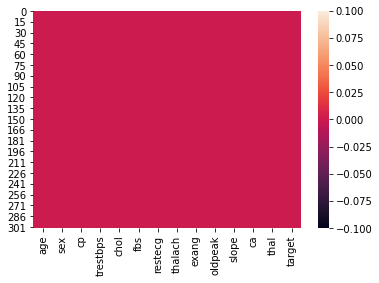

In [14]:
sns.heatmap(heart.isnull(), cbar=True)
plt.show();

In [15]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
heart.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
34     2
37     2
38     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



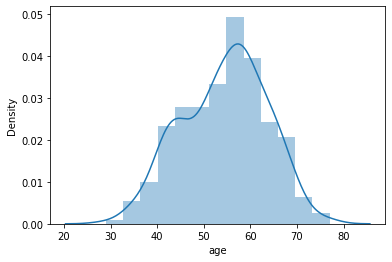

In [17]:
sns.distplot(heart.age);

In [18]:
heart.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

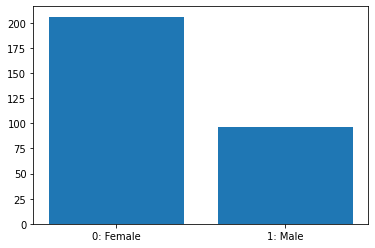

In [19]:
label = ['0: Female', '1: Male']
plt.bar(label, heart['sex'].value_counts())
plt.show()

In [20]:
heart.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [21]:
val=heart['cp'].values
fig = px.pie(heart, values=val, names='cp', title='cp value pie chart',hole=0.4)
fig.show()

In [22]:
val=heart['cp'].values
fig = px.pie(heart, values=val, names='cp', title='cp value pie chart',hole=0.4)
fig.show()

In [23]:
val=heart['cp'].values
fig=px.bar(heart, x=heart['cp'],y=val)
fig.show()

In [24]:
heart.trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbps, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



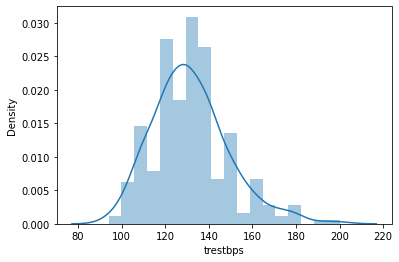

In [25]:
sns.distplot(heart.trestbps);

In [26]:
heart.chol.value_counts()

234    6
204    6
197    6
212    5
254    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



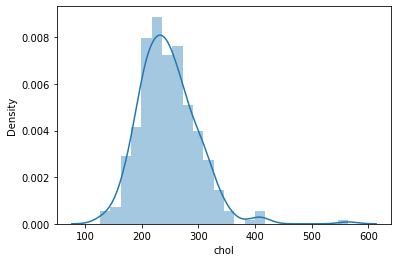

In [27]:
sns.distplot(heart.chol);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



0    257
1     45
Name: fbs, dtype: int64

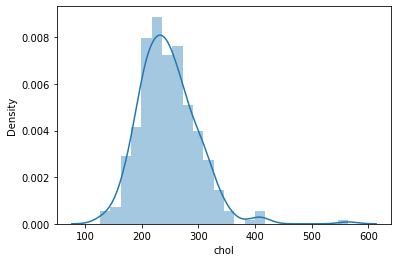

In [28]:
sns.distplot(heart.chol);heart.fbs.value_counts()

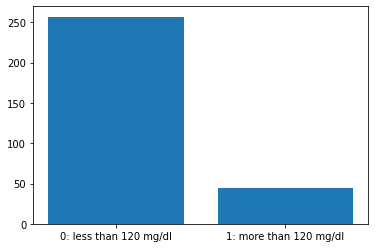

In [29]:
label = ['0: less than 120 mg/dl', '1: more than 120 mg/dl']
plt.bar(label, heart['fbs'].value_counts())
plt.show()

In [30]:
heart.restecg.value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

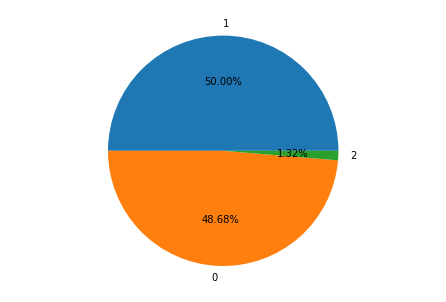

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1', '0', '2']
ax.pie(heart['restecg'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

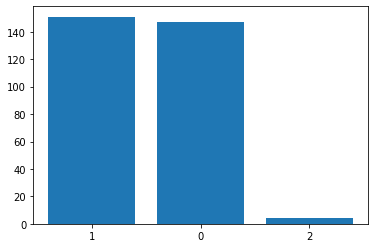

In [32]:
plt.bar(label, heart['restecg'].value_counts())
plt.show()

In [33]:
heart.thalach.value_counts()

162    11
160     9
163     9
152     8
173     7
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



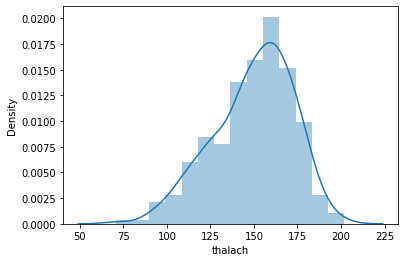

In [34]:
sns.distplot(heart.thalach);

In [35]:
heart.exang.value_counts()

0    203
1     99
Name: exang, dtype: int64

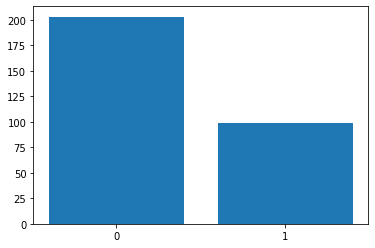

In [36]:
label = ['0', '1']
plt.bar(label, heart['exang'].value_counts())
plt.show()

In [37]:
heart.oldpeak.value_counts()

0.0    98
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



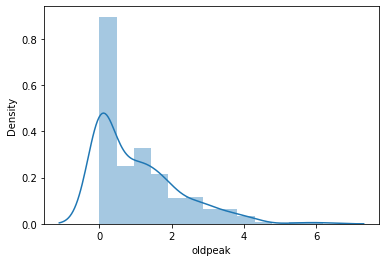

In [38]:
sns.distplot(heart.oldpeak);

In [39]:
heart.slope.value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

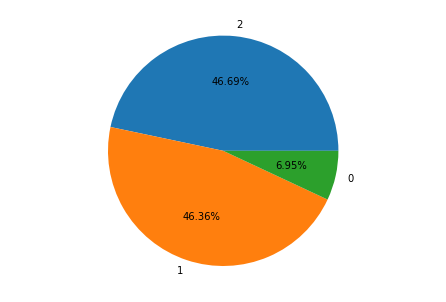

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['2', '1', '0']
ax.pie(heart['slope'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

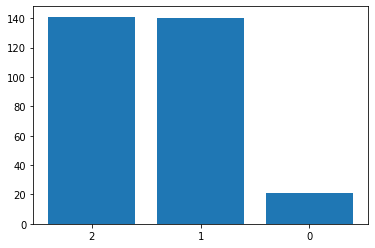

In [41]:
plt.bar(label, heart['slope'].value_counts())
plt.show()

In [42]:
heart.ca.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

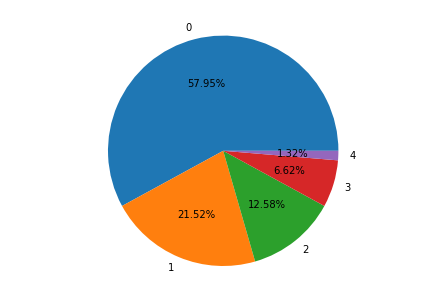

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0', '1', '2', '3', '4']
ax.pie(heart['ca'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

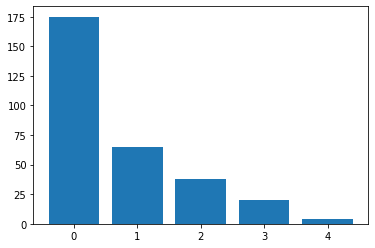

In [44]:
plt.bar(label, heart['ca'].value_counts())
plt.show()

In [45]:
heart.thal.value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

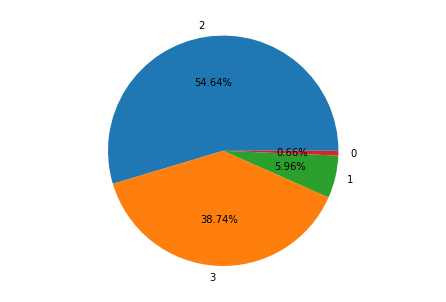

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['2', '3', '1', '0']
ax.pie(heart['thal'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

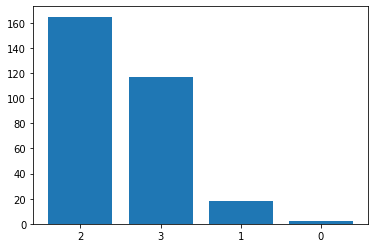

In [47]:
plt.bar(label, heart['thal'].value_counts())
plt.show()

In [48]:
heart.target.value_counts()

1    164
0    138
Name: target, dtype: int64

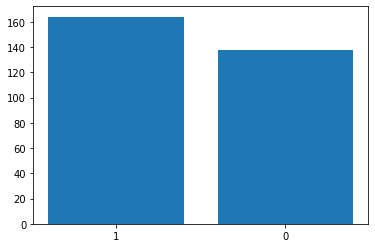

In [49]:
label = ['1', '0']
plt.bar(label, heart['target'].value_counts())
plt.show()

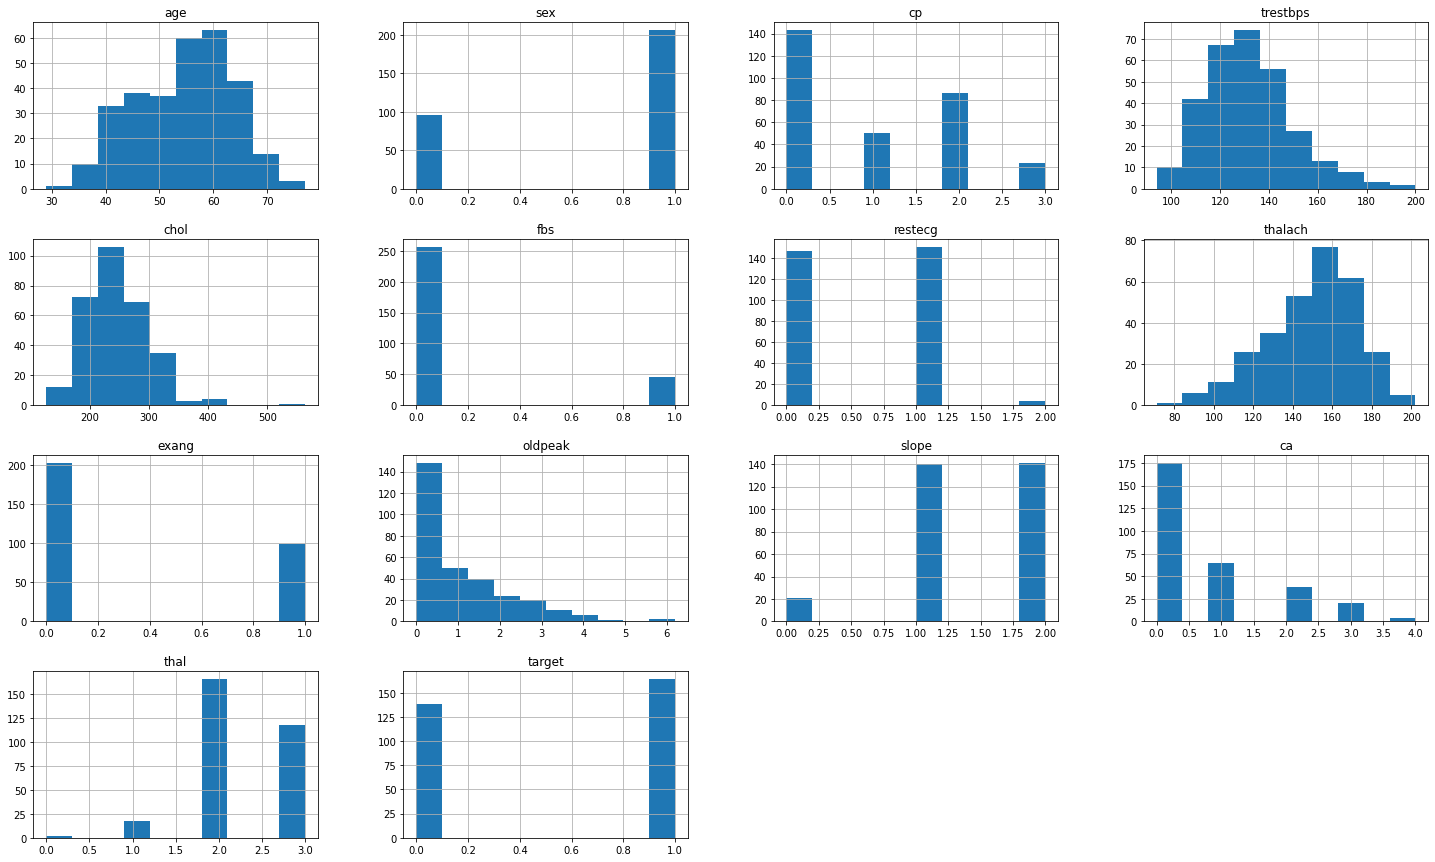

In [50]:
heart.hist(figsize=(25,15), xrot=-0)
plt.show()

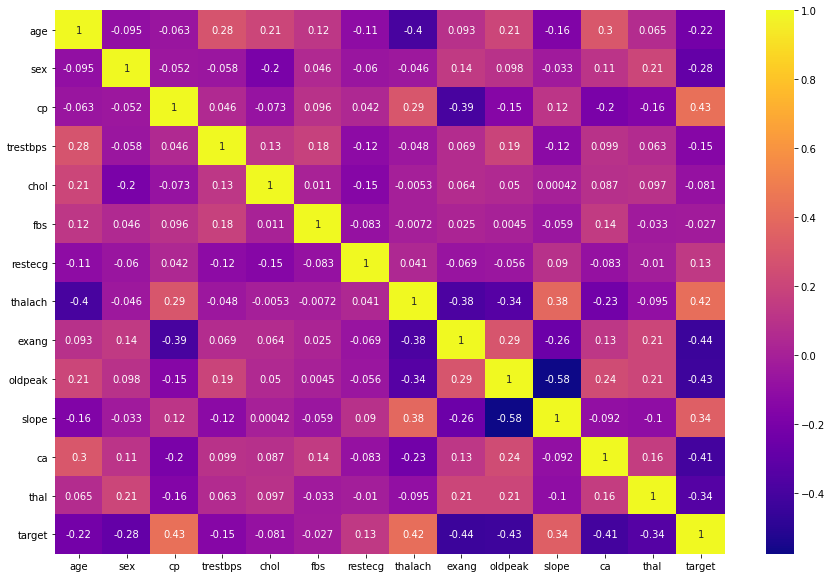

In [51]:
#correlation heat map 
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(heart.corr(),cmap='plasma', annot=True)

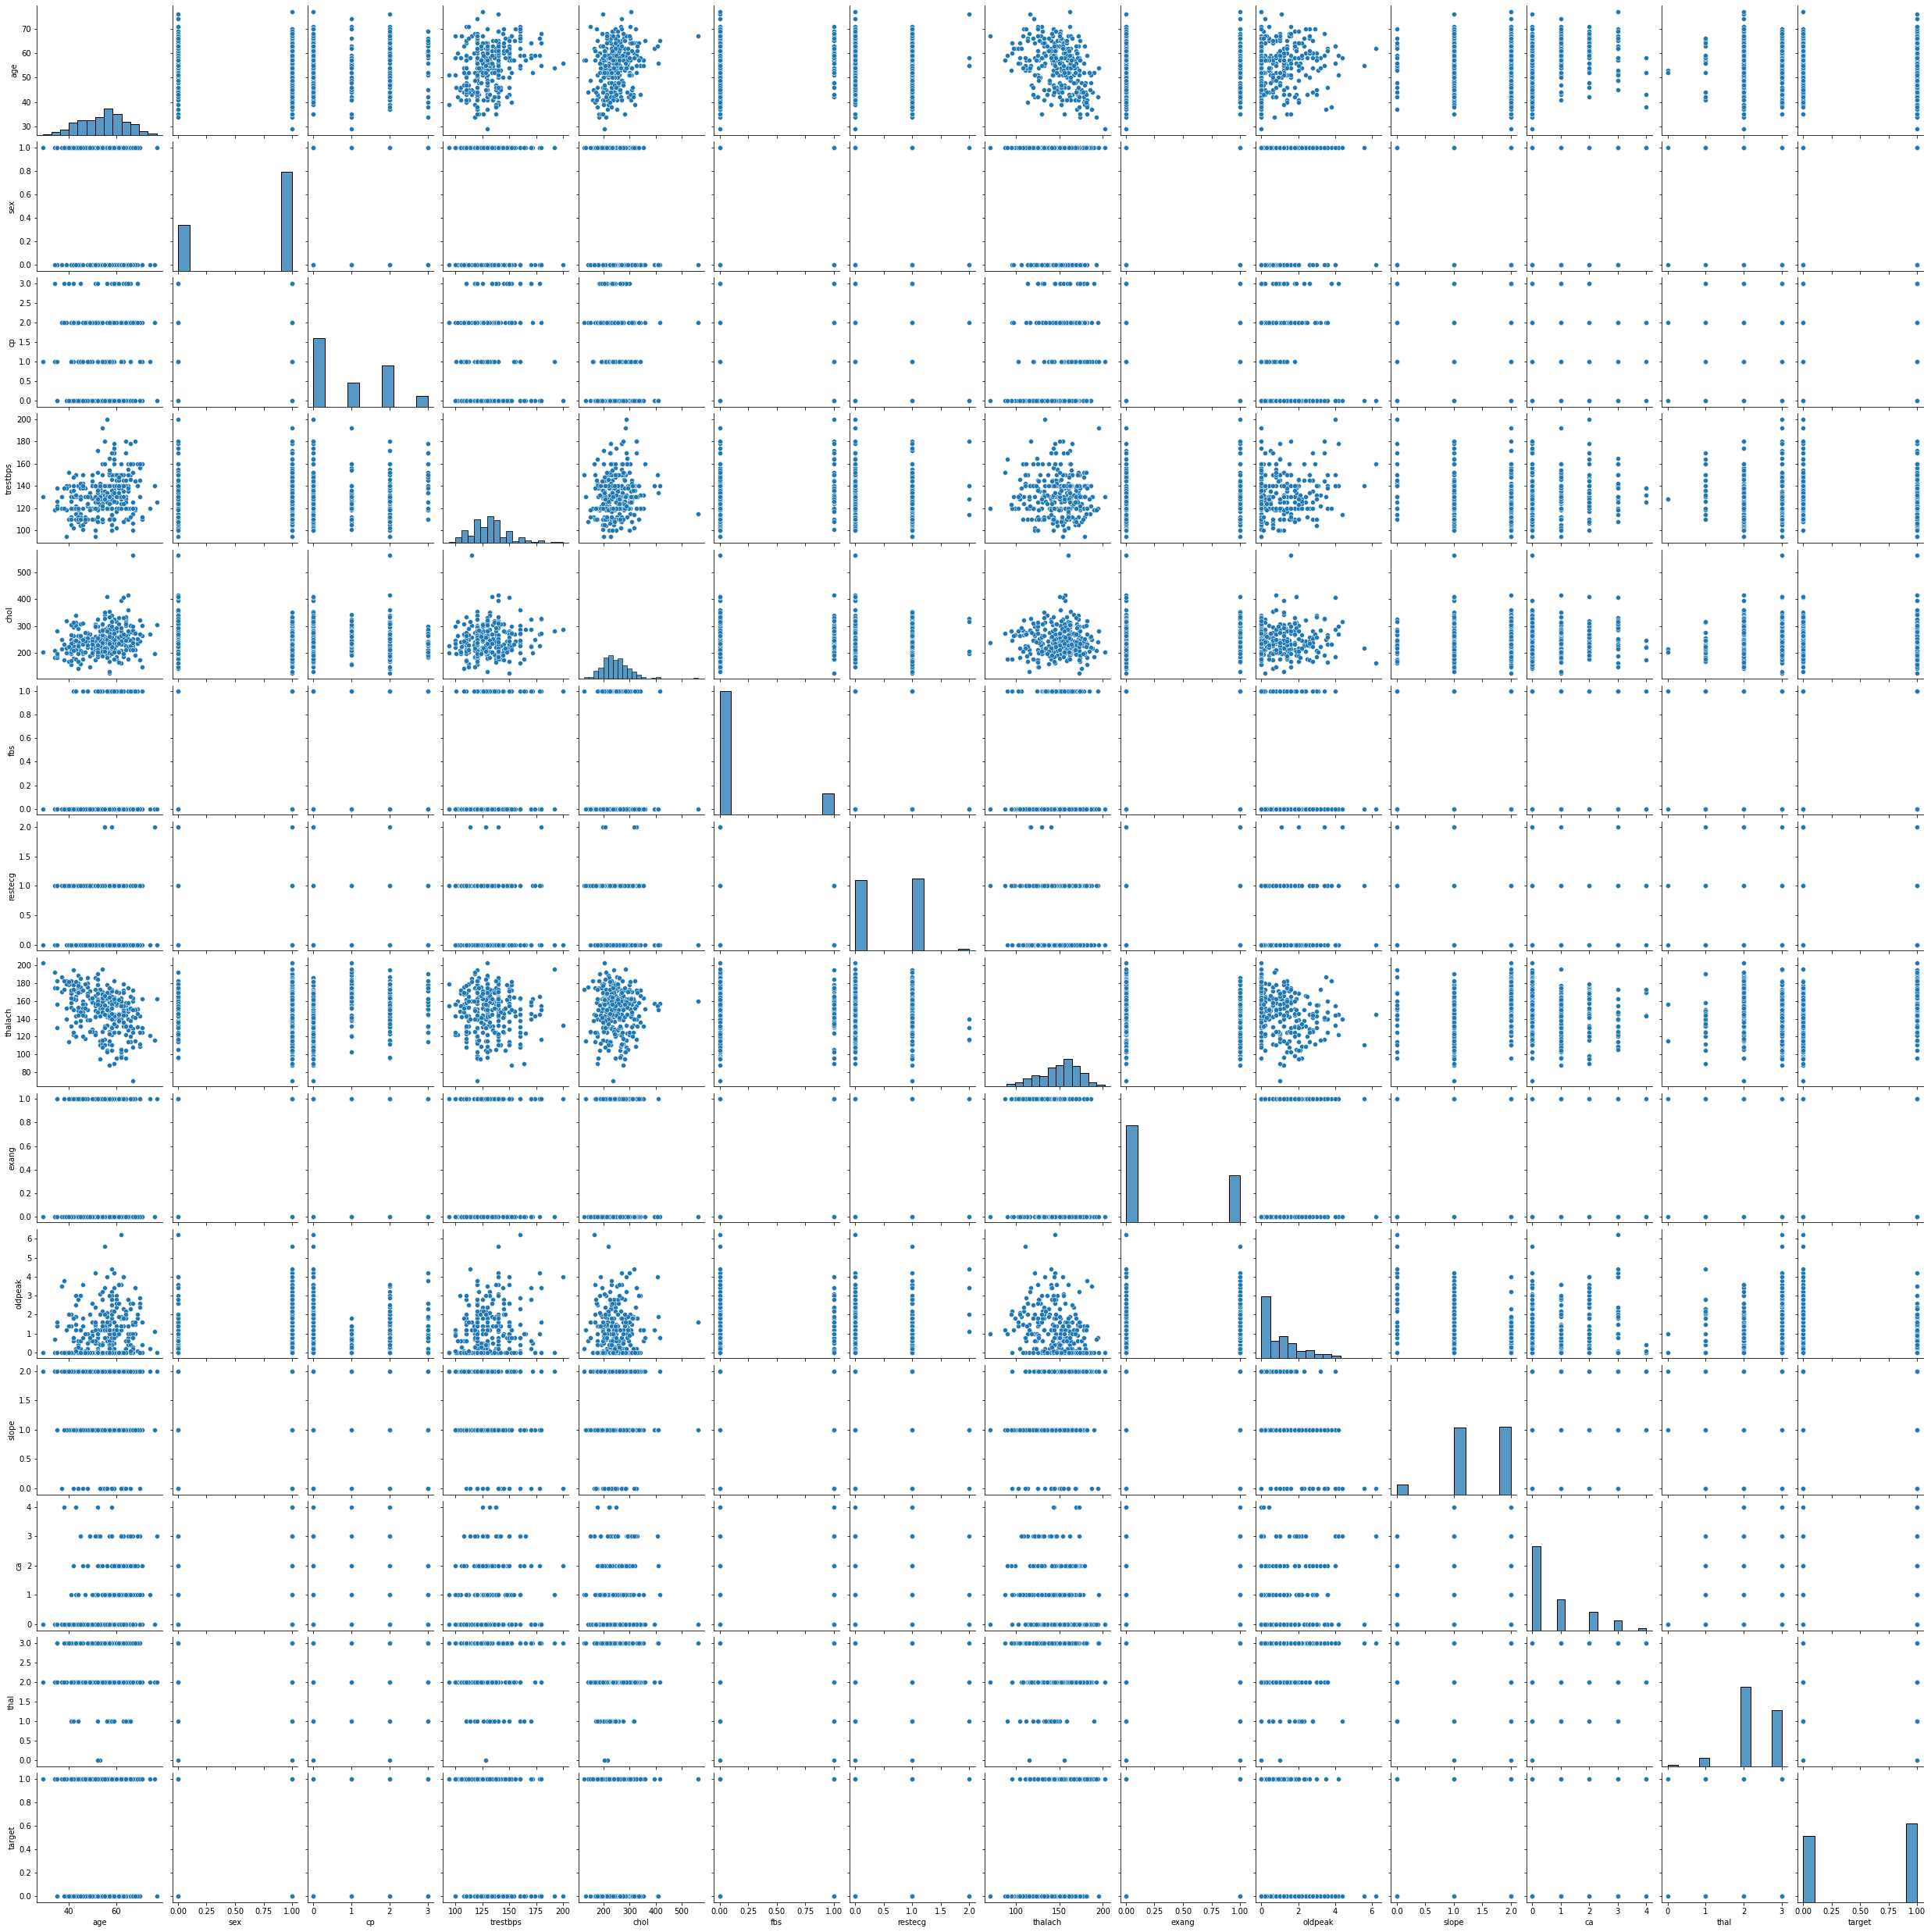

In [52]:
sns.pairplot(heart)

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [54]:
x=heart.drop(["target","slope"],axis=1)
y=heart["target"]

In [55]:
bestfeatures = SelectKBest(score_func=f_classif , k=7)
fit = bestfeatures.fit(x,y)

In [56]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [57]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

In [58]:
print(featureScores.nlargest(14,"Score"))

    Features      Score
8      exang  70.255191
2         cp  68.864299
9    oldpeak  67.721931
7    thalach  64.237793
10        ca  60.262749
11      thal  40.027376
1        sex  26.240952
0        age  15.474511
3   trestbps   6.558676
6    restecg   5.558449
4       chol   2.002888
5        fbs   0.216045


In [59]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
heart.shape

(302, 14)

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

In [62]:
model = ExtraTreesClassifier()
feature = model.fit(x,y)
print(model.feature_importances_)

[0.07635998 0.05473009 0.13883905 0.06538642 0.06769901 0.02226926
 0.03558263 0.09687899 0.10311311 0.1057652  0.13124128 0.10213498]


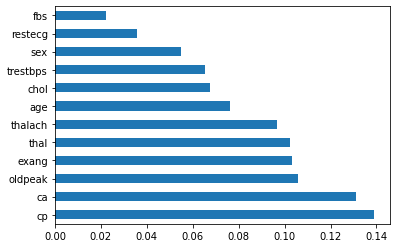

In [63]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_reg = LogisticRegression()

In [69]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
from sklearn import metrics as m
acc_log_reg_train = log_reg.score(x_train, y_train) * 100
print("Percentange of training Score of Logistic model is ",acc_log_reg_train)

Percentange of training Score of Logistic model is  83.40248962655602


In [71]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [72]:
from sklearn.metrics import accuracy_score
acc_log_reg = accuracy_score(y_test, y_pred) * 100
print("Percentage of accuracy score: ",acc_log_reg)

Percentage of accuracy score:  86.88524590163934


In [73]:
from sklearn.metrics import roc_auc_score
ROC_log_reg = roc_auc_score(y_test, y_pred)
print("ROC_AUC_score : ", ROC_log_reg)

ROC_AUC_score :  0.8652597402597402


In [74]:
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[23,  5],
       [ 3, 30]])

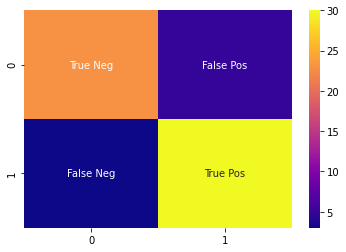

In [75]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_model = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [78]:
acc_knn_model_train = knn_model.score(x_train, y_train) * 100
print("Percentange of training Score of KNN model is ",acc_log_reg_train)

Percentange of training Score of KNN model is  83.40248962655602


In [79]:
y_pred = knn_model.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [80]:
acc_knn_model = accuracy_score(y_test, y_pred) * 100
print("Percentage of accuracy score: ",acc_knn_model)

Percentage of accuracy score:  78.68852459016394


In [81]:
ROC_knn_model = roc_auc_score(y_test, y_pred)
print("ROC_AUC_score : ", ROC_knn_model)

ROC_AUC_score :  0.7840909090909092


In [82]:
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[21,  7],
       [ 6, 27]])

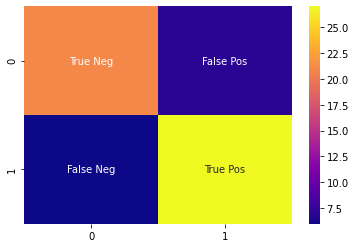

In [83]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [86]:
acc_dt_model_train = dt_model.score(x_train, y_train) * 100
print("Percentage of training score: ",acc_dt_model_train)

Percentage of training score:  100.0


In [87]:
y_pred = dt_model.predict(x_test)
y_pred[:5]

array([1, 1, 0, 0, 1])

In [88]:
acc_dt_model = accuracy_score(y_test, y_pred)*100
print("Percentage of accuracy score: ",acc_dt_model)

Percentage of accuracy score:  73.77049180327869


In [89]:
prec_rec_dt_model = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec_dt_model)

              precision    recall  f1-score   support

           0       0.69      0.79      0.73        28
           1       0.79      0.70      0.74        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [90]:
ROC_dt_model = roc_auc_score(y_test, y_pred)
print("ROC_AUC_score : ", ROC_dt_model)

ROC_AUC_score :  0.7413419913419913


In [91]:
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[22,  6],
       [10, 23]])

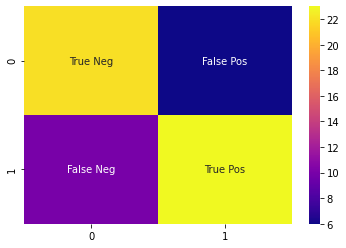

In [92]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
N_model = GaussianNB()
N_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
acc_N_model_train = N_model.score(x_train, y_train) * 100
print("Percentage of training score: ",acc_N_model_train)

Percentage of training score:  85.06224066390041


In [96]:
y_pred = N_model.predict(x_test)
y_pred[:5]

array([1, 1, 0, 1, 1])

In [97]:
acc_N_model = accuracy_score(y_test, y_pred)*100
print("Percentage of accuracy score : ",acc_N_model)

Percentage of accuracy score :  78.68852459016394


In [98]:
prec_rec_N_model = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec_N_model)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [99]:
ROC_N_model = roc_auc_score(y_test, y_pred)
print("ROC_AUC_score : ", ROC_N_model)

ROC_AUC_score :  0.7813852813852814


In [100]:
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix  

array([[20,  8],
       [ 5, 28]])

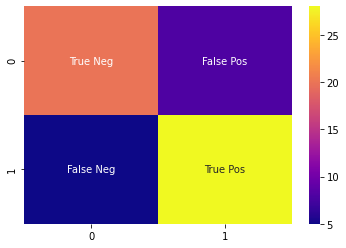

In [101]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf_model = RandomForestClassifier(random_state = 42, criterion = "entropy")
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [104]:
acc_rf_model_train = rf_model.score(x_train, y_train) * 100
print("Percentage of training score: ",acc_rf_model_train)

Percentage of training score:  100.0


In [105]:
y_pred = rf_model.predict(x_test)
y_pred[:5]

array([1, 1, 1, 0, 1])

In [106]:
acc_rf_model = accuracy_score(y_test, y_pred)* 100
print("Percentage of accuracy score: ",acc_rf_model)

Percentage of accuracy score:  83.60655737704919


In [107]:
prec_rec_rf_model = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec_rf_model)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [108]:
ROC_rf_model = roc_auc_score(y_test, y_pred)
print("ROC_AUC_score : ", ROC_rf_model)

ROC_AUC_score :  0.8376623376623378


In [109]:
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[24,  4],
       [ 6, 27]])

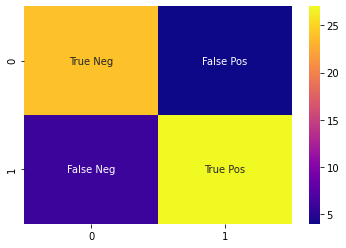

In [110]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
Ada = AdaBoostClassifier()
Ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [113]:
acc_Ada_train = Ada.score(x_train, y_train) * 100
print("Percentage of training score: ",acc_Ada_train)

Percentage of training score:  91.28630705394191


In [114]:
#Predicting the results with test set
y_pred = Ada.predict(x_test)
y_pred[:5]

array([1, 1, 1, 1, 1])

In [115]:
acc_Ada = accuracy_score(y_test, y_pred)* 100
print("Percentage of accuracy score : ",acc_Ada)

Percentage of accuracy score :  83.60655737704919


In [116]:
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[22,  6],
       [ 4, 29]])

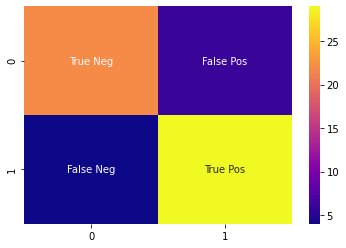

In [117]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

In [118]:
# Printing the precision and recall, among other metrics
prec_rec_Ada = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec_Ada)

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [119]:
ROC_Ada = roc_auc_score(y_test, y_pred)
print("ROC_AUC_score : ", ROC_Ada)

ROC_AUC_score :  0.8322510822510822


In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
GB = GradientBoostingClassifier()

In [122]:
GB.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [123]:
acc_GB_train = GB.score(x_train, y_train) * 100
print("Percentage of training score: ",acc_GB_train)

Percentage of training score:  100.0


In [124]:
y_pred = GB.predict(x_test)
y_pred[:5]

array([1, 1, 1, 1, 1])

In [125]:
acc_GB = accuracy_score(y_test, y_pred)* 100
print("Percentage of accuracy score : ",acc_GB)

Percentage of accuracy score :  81.9672131147541


In [126]:
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[23,  5],
       [ 6, 27]])

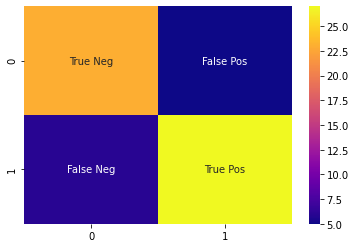

In [127]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

In [128]:
prec_rec_GB = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec_GB)

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [129]:
ROC_GB = roc_auc_score(y_test, y_pred)
print("ROC_AUC_score : ", ROC_GB)

ROC_AUC_score :  0.8198051948051949


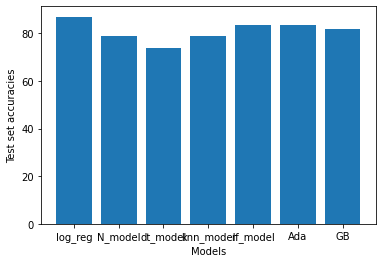

In [130]:
labels=['log_reg','N_model','dt_model','knn_model','rf_model','Ada','GB']
Acc_Test=[acc_log_reg,acc_N_model,acc_dt_model,acc_knn_model,acc_rf_model,acc_Ada,acc_GB]
plt.bar(labels,Acc_Test)
plt.xlabel('Models')
plt.ylabel('Test set accuracies')
plt.show()

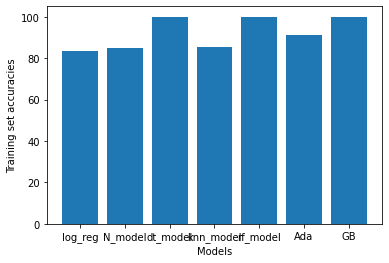

In [131]:
Acc_Train=[acc_log_reg_train,acc_N_model_train,acc_dt_model_train,acc_knn_model_train,acc_rf_model_train,acc_Ada_train,acc_GB_train]
plt.bar(labels,Acc_Train)
plt.xlabel('Models')
plt.ylabel('Training set accuracies')
plt.show()

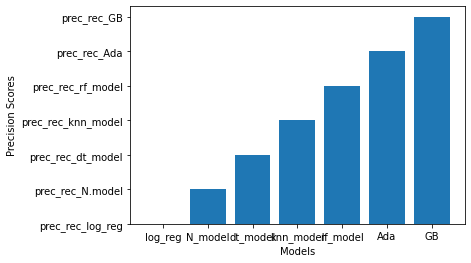

In [132]:
PS=['prec_rec_log_reg','prec_rec_N.model','prec_rec_dt_model','prec_rec_knn_model','prec_rec_rf_model','prec_rec_Ada','prec_rec_GB']
plt.bar(labels,PS)
plt.xlabel('Models')
plt.ylabel('Precision Scores')
plt.show()

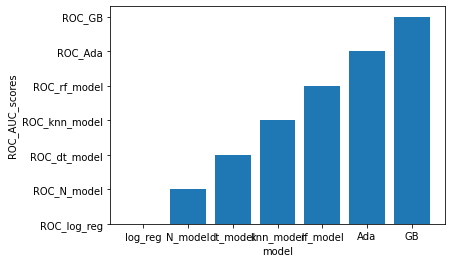

In [133]:
ROC=['ROC_log_reg','ROC_N_model','ROC_dt_model','ROC_knn_model','ROC_rf_model','ROC_Ada','ROC_GB']
plt.bar(labels,ROC)
plt.xlabel('model')
plt.ylabel('ROC_AUC_scores')
plt.show()

# Conclusion

1.All the models are working. But we have to choose the best suitable model for the given problem statement. On the basis of comparision, Logistic Regression is the best suited method. As, the results seems highly promising.

2.Exercise induced angina,Chest pain is major symptoms of heart attack.